In [1]:
import json
import glob

ver = 'v20200515'
# domain = 'global' #'land'  'ocean'
domain = 'land' #'land'  'ocean'
# domain = 'ocean' #'land'  'ocean'

list_json = glob.glob('pr.cmip6.historical*' + ver + '*.json')   # Powerful way to read in a python *list* of local filenames
print(list_json)


['pr.cmip6.historical.conservative.2p5x2p5.v20200515.json', 'pr.cmip6.historical.linear.2p5x2p5.v20200515.json', 'pr.cmip6.historical.regrid2.2p5x2p5.v20200515.json']


In [2]:
regrid_options = []   # [] pre-defines a python list
stats_dict = {}  # pre-defines a python *dictionary*

### GET THE LIST OF MODELS FROM ONE (FIRST ONE IN THE LIST) OF THE JSON FILES
fo = open(list_json[0])
d = json.load(fo)  # the contents of each json file are loaded as a python *dictionary* which can and here does have nested dictionaries
print(fo)
#print(d)
print(d.keys())


<_io.TextIOWrapper name='pr.cmip6.historical.conservative.2p5x2p5.v20200515.json' mode='r' encoding='UTF-8'>
dict_keys(['provenance', 'DISCLAIMER', 'USER_NOTES', 'RESULTS', 'Variable', 'json_version', 'References', 'RegionalMasking', 'GridInfo', 'METRICS', 'json_structure', 'YAML'])


In [3]:
models = list(d['RESULTS'].keys())   # read dictionary keys as a python list
# Note if using python 2  models = d['RESULTS'] works
print(models, models[0])


['FGOALS-g3', 'EC-Earth3-Veg', 'MIROC6', 'CESM2-WACCM', 'KACE-1-0-G', 'MCM-UA-1-0', 'GISS-E2-1-G', 'NorCPM1', 'CAMS-CSM1-0', 'MPI-ESM-1-2-HAM', 'BCC-ESM1', 'INM-CM4-8', 'NESM3', 'MRI-ESM2-0', 'BCC-CSM2-MR', 'CESM2-WACCM-FV2', 'FIO-ESM-2-0', 'MPI-ESM1-2-LR', 'GISS-E2-1-H', 'SAM0-UNICON', 'GFDL-CM4', 'GFDL-ESM4', 'ACCESS-ESM1-5', 'CIESM', 'TaiESM1', 'E3SM-1-0', 'CanESM5', 'NorESM2-MM', 'E3SM-1-1-ECA', 'MPI-ESM1-2-HR', 'EC-Earth3', 'CESM2-FV2', 'GISS-E2-1-G-CC', 'E3SM-1-1', 'ACCESS-CM2', 'IPSL-CM6A-LR', 'INM-CM5-0', 'CESM2'] FGOALS-g3


In [4]:
### DEFINE DICTIONARIES WITHIN THE MAIN DICTIONARY stats_dict
for mod in models:
 stats_dict[mod] = {}

for f in list_json:
   fo = open(f)
   d = json.load(fo)
   print('------------')
   print(f)
   print(f.split('.'))
   print(f.split('.')[3])
   regridtype = f.split('.')[3]
   regrid_options.append(regridtype)   #  .append is a way to add to a list

   for mod in models:
     stats_dict[mod][regridtype] = {}    # creates a dictionary in the dictionary stats_dict # compare with line above stats_dict[mod] = {}

     try:
      cor = d['RESULTS'][mod]['default']['r1i1p1'][domain]['cor_xy']['ann']   # Definately not beginner python. Good to study how these nested dictonaries work
      std = d['RESULTS'][mod]['default']['r1i1p1'][domain]['std_xy']['ann']
      stats_dict[mod][regridtype] = {'cor': cor, 'std': std}
     except:
      print('missing results for ' + mod)

#save_dictionary to file
outputfilename = 'pr_regrid_stats_for_TD_' + domain + '.' + ver + '.json'

json.dump(stats_dict, open(outputfilename, 'w'), sort_keys=True, indent=4, separators=(',', ': '))  # magic, I don't understand, but its for outputting a python dictionary to a json file.


------------
pr.cmip6.historical.conservative.2p5x2p5.v20200515.json
['pr', 'cmip6', 'historical', 'conservative', '2p5x2p5', 'v20200515', 'json']
conservative
------------
pr.cmip6.historical.linear.2p5x2p5.v20200515.json
['pr', 'cmip6', 'historical', 'linear', '2p5x2p5', 'v20200515', 'json']
linear
------------
pr.cmip6.historical.regrid2.2p5x2p5.v20200515.json
['pr', 'cmip6', 'historical', 'regrid2', '2p5x2p5', 'v20200515', 'json']
regrid2


In [5]:
### With stats_dict in memory, its time to use matplotlib to compare a Taylor Diagram (TD) to compare results from different regrid methods.

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#labels = list(stats_dict.keys())
labels = sorted(list(stats_dict.keys()))
print(labels)


['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CESM2', 'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CIESM', 'CanESM5', 'E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA', 'EC-Earth3', 'EC-Earth3-Veg', 'FGOALS-g3', 'FIO-ESM-2-0', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'KACE-1-0-G', 'MCM-UA-1-0', 'MIROC6', 'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorCPM1', 'NorESM2-MM', 'SAM0-UNICON', 'TaiESM1']


In [6]:
corregrid2 = []
corconservative = []
corlinear = []
for mod in labels:
   corregrid2.append(float(stats_dict[mod]['regrid2']['cor']))
   corconservative.append(float(stats_dict[mod]['conservative']['cor']))
   corlinear.append(float(stats_dict[mod]['linear']['cor']))
print(corconservative)
print(corlinear)
print(corregrid2)


[0.89, 0.888, 0.822, 0.849, 0.812, 0.915, 0.864, 0.906, 0.857, 0.893, 0.819, 0.865, 0.883, 0.871, 0.926, 0.925, 0.719, 0.831, 0.897, 0.891, 0.761, 0.881, 0.682, 0.887, 0.897, 0.87, 0.914, 0.852, 0.893, 0.819, 0.905, 0.873, 0.934, 0.849, 0.787, 0.93, 0.89, 0.844]
[0.888, 0.875, 0.817, 0.852, 0.79, 0.894, 0.864, 0.886, 0.858, 0.877, 0.825, 0.858, 0.874, 0.864, 0.907, 0.904, 0.704, 0.764, 0.896, 0.886, 0.762, 0.864, 0.681, 0.886, 0.895, 0.861, 0.912, 0.85, 0.874, 0.808, 0.885, 0.864, 0.915, 0.848, 0.79, 0.915, 0.845, 0.773]
[0.883, 0.86, 0.833, 0.838, 0.802, 0.917, 0.874, 0.914, 0.865, 0.899, 0.784, 0.859, 0.876, 0.867, 0.897, 0.898, 0.703, 0.859, 0.898, 0.888, 0.777, 0.849, 0.687, 0.884, 0.891, 0.791, 0.895, 0.845, 0.867, 0.789, 0.875, 0.86, 0.897, 0.864, 0.803, 0.927, 0.878, 0.859]


In [7]:
stdregrid2 = []
stdconservative = []
stdlinear = []
for mod in labels:
   stdregrid2.append(float(stats_dict[mod]['regrid2']['std']))
   stdconservative.append(float(stats_dict[mod]['conservative']['std']))
   stdlinear.append(float(stats_dict[mod]['linear']['std']))
print(stdconservative)
print(stdlinear)
print(stdregrid2)


[2.0, 2.194, 1.912, 2.055, 1.138, 1.753, 1.776, 1.727, 1.724, 0.002, 1.85, 1.651, 1.61, 1.612, 1.783, 1.774, 1.903, 1.826, 1.885, 1.8, 1.668, 0.486, 1.833, 2.076, 2.074, 2.287, 1.961, 20087.094, 2.094, 1.688, 1.747, 1.597, 1.993, 1.885, 1.933, 1.684, 1.529, 1.793]
[2.051, 2.218, 1.969, 2.021, 1.219, 1.928, 1.772, 1.905, 1.721, 0.002, 1.843, 1.714, 1.673, 1.697, 1.963, 1.959, 2.052, 2.106, 1.9, 1.849, 1.664, 0.493, 1.837, 2.157, 2.166, 2.32, 2.0, 19988.788, 2.107, 1.712, 1.787, 1.63, 2.221, 1.921, 1.939, 1.814, 1.612, 1.995]
[2.165, 2.528, 2.026, 2.165, 1.244, 2.011, 1.865, 1.989, 1.796, 0.002, 2.012, 1.779, 1.744, 1.811, 1.954, 1.954, 2.807, 1.981, 1.856, 1.829, 1.939, 0.964, 2.161, 2.271, 2.282, 2.821, 2.043, 20606.085, 2.086, 1.677, 1.747, 1.629, 2.365, 2.056, 1.982, 1.867, 1.557, 1.908]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


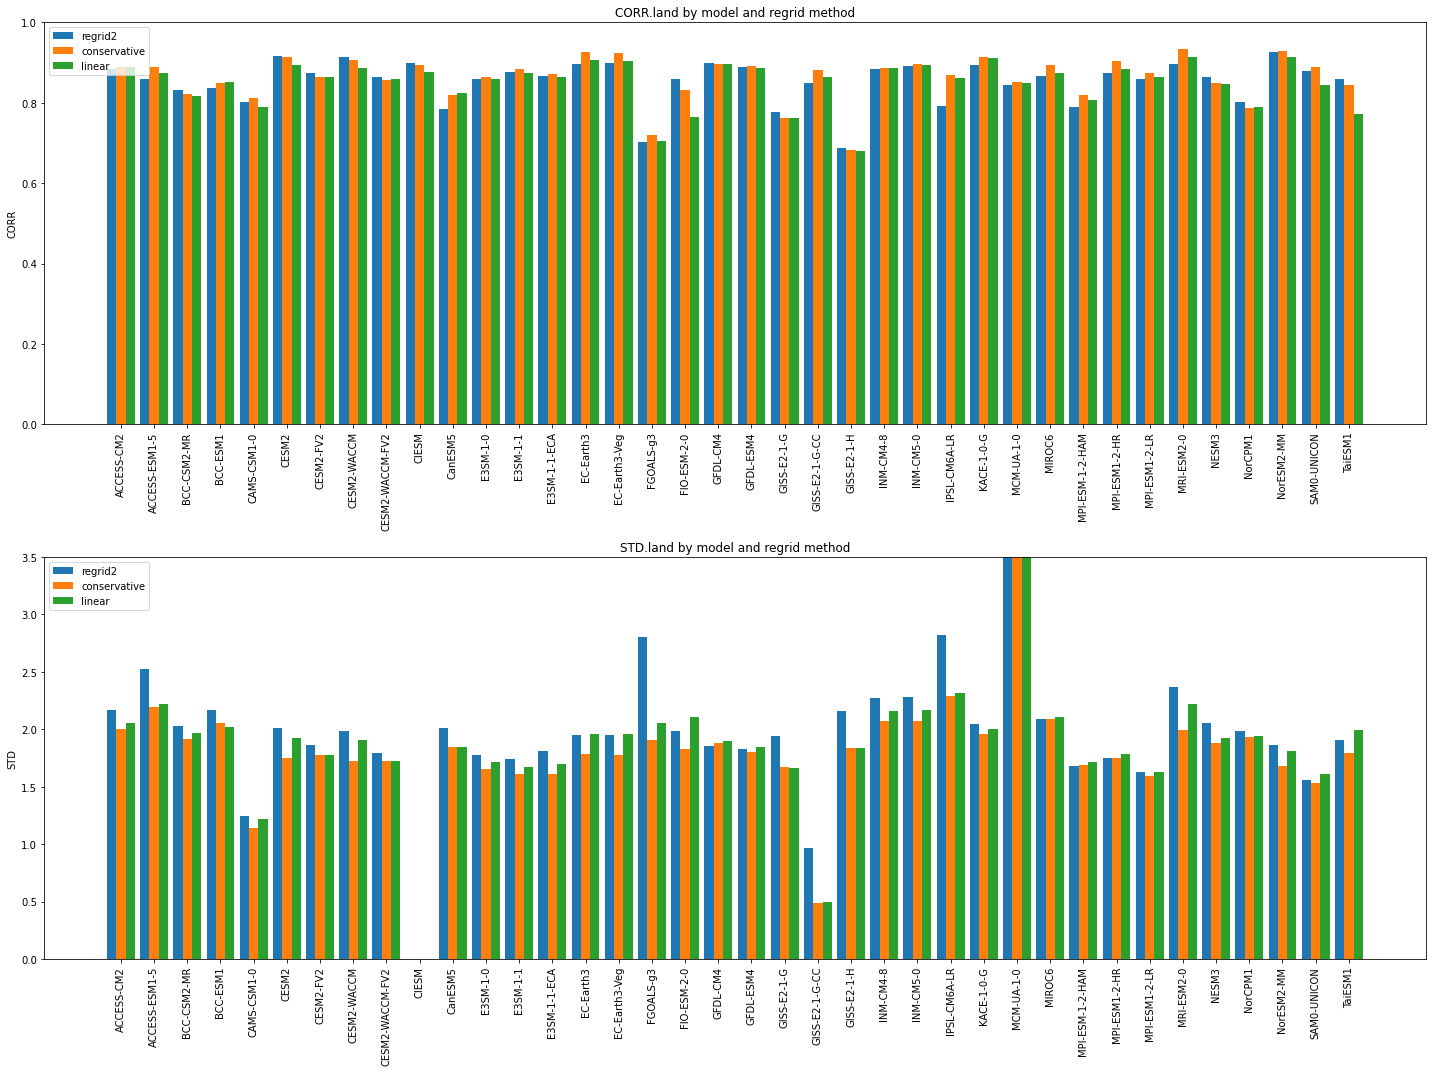

In [8]:
x = np.arange(len(labels))  # the label locations
print(x)
width = 0.28  # the width of the bars

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,1,1)
ax1.bar(x - width, corregrid2, width, label='regrid2')
ax1.bar(x, corconservative, width, label='conservative')
ax1.bar(x + width, corlinear, width, label='linear')
ax1.set_ylim(0,1)

ax2 = fig.add_subplot(2,1,2)
ax2.bar(x - width, stdregrid2, width, label='regrid2')
ax2.bar(x, stdconservative, width, label='conservative')
ax2.bar(x + width, stdlinear, width, label='linear')
ax2.set_ylim(0,3.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('CORR')
ax1.set_title('CORR.' + domain + ' by model and regrid method')
ax1.set_xticks(x)
#ax1.set_xticklabels(labels, rotation=90, ha='right')
ax1.set_xticklabels(labels, rotation=90)
ax1.legend(loc='upper left')

ax2.set_ylabel('STD')
ax2.set_title('STD.' + domain + ' by model and regrid method')
ax2.set_xticks(x)
#ax2.set_xticklabels(labels, rotation=90, ha='right')
ax2.set_xticklabels(labels, rotation=90)
ax2.legend(loc='upper left')

fig.tight_layout()

plt.savefig('bar.' + domain + '.' + ver + '.png')
plt.show()
